In [107]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
from tensorflow.keras import layers
from tensorflow.keras import Model, models
from tensorflow.keras.optimizers import Adam




%matplotlib inline

In [108]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39
loss = (y - y_hat)**2
print(loss)

tf.Tensor(9, shape=(), dtype=int32)


In [109]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

tf.Tensor(20, shape=(), dtype=int32)


In [110]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train)
print(x_test.shape, y_test)
x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32')/255


(60000, 28, 28) [5 0 4 ... 5 6 8]
(10000, 28, 28) [7 2 1 ... 4 5 6]


y = 0


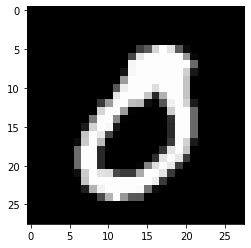

In [111]:
index = 75
plt.imshow(x_train[index],cmap='gray')
print ("y = " + str(np.squeeze(y_train[ index])))

In [112]:
print(x_train.shape)

(60000, 28, 28, 1)


In [113]:
model = models.Sequential()
model.add(layers.Conv2D(6,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [116]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_22 (Dense)             (None, 84)               

In [117]:
train_labels = tf.keras.utils.to_categorical(y_train)
test_labels = tf.keras.utils.to_categorical(y_test)

In [118]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [119]:
model.fit(x_train,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 39s 39ms/step - loss: 0.2415 - accuracy: 0.9290
Epoch 2/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0731 - accuracy: 0.9777
Epoch 3/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0330 - accuracy: 0.9897


In [120]:
test_loss, test_acc = model.evaluate(x_test, test_labels)
test_acc

313/313 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9881


0.988099992275238